<br>
<img src="data/logoMoSEF.jpeg" width=90px align="left">
<div align="right">Enseignant : Amed Coulibaly</div>
<div align="right">Réalisé par : Gaoussou DIAKITE et Eunice KOFFI</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 Modélistaion Statistiques Economiques et Financières</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet Data Mining</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen"> ** Analyse exploratoire des données ** </span></div><br>
<hr>

# Importation des modules et packages

In [1]:
#Importation des modules et packages 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

# Lecture des bases de données

In [2]:
# Lecture de la base tourisme , low_memory=False
base_tourisme=pd.read_csv('data/base-cc-tourisme-2022-geo2022.csv', sep=';', low_memory=False)

# Lecture de la base historique
base_historique = pd.read_excel('data/base-pop-historiques-1876-2019.xlsx', sheet_name='pop_1876_2019', header=5)

# Lecture de la base consommation
consommation = pd.read_csv('data/conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-commune-france.csv')

In [3]:
# Caractéristiques des tables
print('La base tourisme a ', base_tourisme.shape[0], 'lignes et ', base_tourisme.shape[1], 'colones.')
print('La base historique a ', base_historique.shape[0], 'lignes et ', base_historique.shape[1], 'colones.')
print('La base consommation a ', consommation.shape[0], 'lignes et ', consommation.shape[1], 'colones.')

La base tourisme a  34983 lignes et  52 colones.
La base historique a  34967 lignes et  37 colones.
La base consommation a  46584 lignes et  36 colones.


# Jointure des tables

Les deux bases de données ont une variable en commun qui est la variable CODGEO. Certaines observations qui se trouvent dans la base de `données historique` peuvent être absentes dans la base de `données de tourisme`. Nous souhaitons avoir dans notre base de données toutes les informations des deux tables. Nous allons donc cylindrer notre base en faisant une jointure interne. C'est-à-dire que nous récupérons les données qui sont à la fois dans les deux bases de données. 

In [4]:
# Jointure des tables --> inner join
table = base_tourisme.merge(base_historique,how="inner",on="CODGEO")
print('La base de données a', table.shape[0], 'lignes et', table.shape[1], 'colones.')

La base de données a 34957 lignes et 88 colones.


In [5]:
table['CODGEO'].nunique()

34957

Nous avons donc 34957 CODGEO communes aux deux tables et la base de données ne contient donc pas de doublons.

In [6]:
table.head()

,CODGEO,HT22,HT022,HT122,HT222,HT322,HT422,HT522,HTCH22,HTCH022,...,PTOT1926,PTOT1921,PTOT1911,PTOT1906,PTOT1901,PTOT1896,PTOT1891,PTOT1886,PTOT1881,PTOT1876
0,01001,0,0,0,0,0,0,0,0,0,...,543.0,566.0,560.0,629.0,637.0,572.0,594.0,622.0,605.0,604.0
1,01002,0,0,0,0,0,0,0,0,0,...,253.0,256.0,291.0,323.0,357.0,391.0,421.0,486.0,490.0,484.0
2,01004,1,0,0,0,1,0,0,34,0,...,5705.0,4796.0,4334.0,4100.0,4023.0,3548.0,3635.0,3618.0,3396.0,3427.0
3,01005,2,1,0,0,1,0,0,20,7,...,690.0,698.0,805.0,805.0,835.0,852.0,862.0,882.0,879.0,848.0
4,01006,0,0,0,0,0,0,0,0,0,...,161.0,150.0,159.0,193.0,200.0,206.0,200.0,200.0,213.0,191.0


In [7]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34957 entries, 0 to 34956
Data columns (total 88 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     34957 non-null  object 
 1   HT22       34957 non-null  int64  
 2   HT022      34957 non-null  int64  
 3   HT122      34957 non-null  int64  
 4   HT222      34957 non-null  int64  
 5   HT322      34957 non-null  int64  
 6   HT422      34957 non-null  int64  
 7   HT522      34957 non-null  int64  
 8   HTCH22     34957 non-null  int64  
 9   HTCH022    34957 non-null  int64  
 10  HTCH122    34957 non-null  int64  
 11  HTCH222    34957 non-null  int64  
 12  HTCH322    34957 non-null  int64  
 13  HTCH422    34957 non-null  int64  
 14  HTCH522    34957 non-null  int64  
 15  CPG22      34957 non-null  int64  
 16  CPG022     34957 non-null  int64  
 17  CPG122     34957 non-null  int64  
 18  CPG222     34957 non-null  int64  
 19  CPG322     34957 non-null  int64  
 20  CPG422

La variable REG n'est pas dans le bon format. Nous allons la mettre dans le bon format

In [8]:
table['REG'] = table['REG'].astype(str)

**Liste des variables en fonction de leurs types**

In [9]:
def list_var(df):
    
    col_categoricals = []
    col_numericals_float = []
    col_numericals_int = []
    for col in df.columns :
        if df[col].dtypes == 'float64':
            col_numericals_float.append(col)
        elif df[col].dtypes == 'object' :
            col_categoricals.append(col)
        elif df[col].dtypes == 'int64':
            col_numericals_int.append(col)

    print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
    print(f"\nListe des colonnes numériques décimales :\n{col_numericals_float}")
    print(f"\nListe des colonnes numériques entières :\n{col_numericals_int}")
    
    return col_categoricals, col_numericals_float, col_numericals_int

In [10]:
col_categoricals, col_numericals_float, col_numericals_int = list_var (table)

Liste des colonnes catégorielles :
['CODGEO', 'REG', 'DEP', 'LIBGEO']

Liste des colonnes numériques décimales :
['PTOT54', 'PTOT36', 'PTOT1931', 'PTOT1926', 'PTOT1921', 'PTOT1911', 'PTOT1906', 'PTOT1901', 'PTOT1896', 'PTOT1891', 'PTOT1886', 'PTOT1881', 'PTOT1876']

Liste des colonnes numériques entières :
['HT22', 'HT022', 'HT122', 'HT222', 'HT322', 'HT422', 'HT522', 'HTCH22', 'HTCH022', 'HTCH122', 'HTCH222', 'HTCH322', 'HTCH422', 'HTCH522', 'CPG22', 'CPG022', 'CPG122', 'CPG222', 'CPG322', 'CPG422', 'CPG522', 'CPGE22', 'CPGE022', 'CPGE122', 'CPGE222', 'CPGE322', 'CPGE422', 'CPGE522', 'CPGEL22', 'CPGEL022', 'CPGEL122', 'CPGEL222', 'CPGEL322', 'CPGEL422', 'CPGEL522', 'CPGEO22', 'CPGEO022', 'CPGEO122', 'CPGEO222', 'CPGEO322', 'CPGEO422', 'CPGEO522', 'VV22', 'VVUH22', 'VVLIT22', 'RT22', 'RTUH22', 'RTLIT22', 'AJCS22', 'AJCSUH22', 'AJCSLIT22', 'PMUN19', 'PMUN18', 'PMUN17', 'PMUN16', 'PMUN15', 'PMUN14', 'PMUN13', 'PMUN12', 'PMUN11', 'PMUN10', 'PMUN09', 'PMUN08', 'PMUN07', 'PMUN06', 'PSDC99',

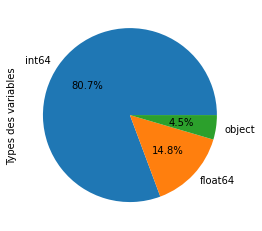

In [11]:
table.dtypes.value_counts().plot(kind="pie",ylabel='Types des variables', autopct = lambda x: str(round(x, 1)) + '%')
plt.show()

# Visualisations de données et statistiques descriptives

In [12]:
print("\n-----------------------------------------Statistiques des variables quantitatives---------------------------------\n")
table.describe()


-----------------------------------------Statistiques des variables quantitatives---------------------------------



,HT22,HT022,HT122,HT222,HT322,HT422,HT522,HTCH22,HTCH022,HTCH122,...,PTOT1926,PTOT1921,PTOT1911,PTOT1906,PTOT1901,PTOT1896,PTOT1891,PTOT1886,PTOT1881,PTOT1876
count,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,...,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000,34485.000000
mean,0.487628,0.121607,0.010041,0.107275,0.174929,0.061790,0.011986,18.671997,2.628801,0.354521,...,1173.162795,1128.918370,1193.127795,1182.480035,1171.161172,1156.105292,1149.983993,1145.589213,1129.965695,1106.877106
std,3.394900,0.617711,0.125831,0.667647,1.407678,0.891347,0.305290,191.184566,19.197963,5.314482,...,7619.273982,7303.666199,7072.196288,6674.605468,6471.721484,6131.941340,5814.476466,5480.971241,5219.098641,4729.400438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,229.000000,230.000000,265.000000,277.000000,283.000000,293.000000,304.000000,315.000000,321.000000,329.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,424.000000,426.000000,488.000000,505.000000,509.000000,520.000000,533.000000,548.000000,556.000000,566.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,830.000000,831.000000,929.000000,955.000000,961.000000,980.000000,1004.000000,1017.000000,1019.000000,1027.000000
max,178.000000,28.000000,7.000000,24.000000,84.000000,62.000000,39.000000,9874.000000,1159.000000,289.000000,...,652196.000000,586341.000000,550619.000000,517498.000000,491161.000000,468311.000000,440315.000000,404172.000000,378581.000000,344513.000000


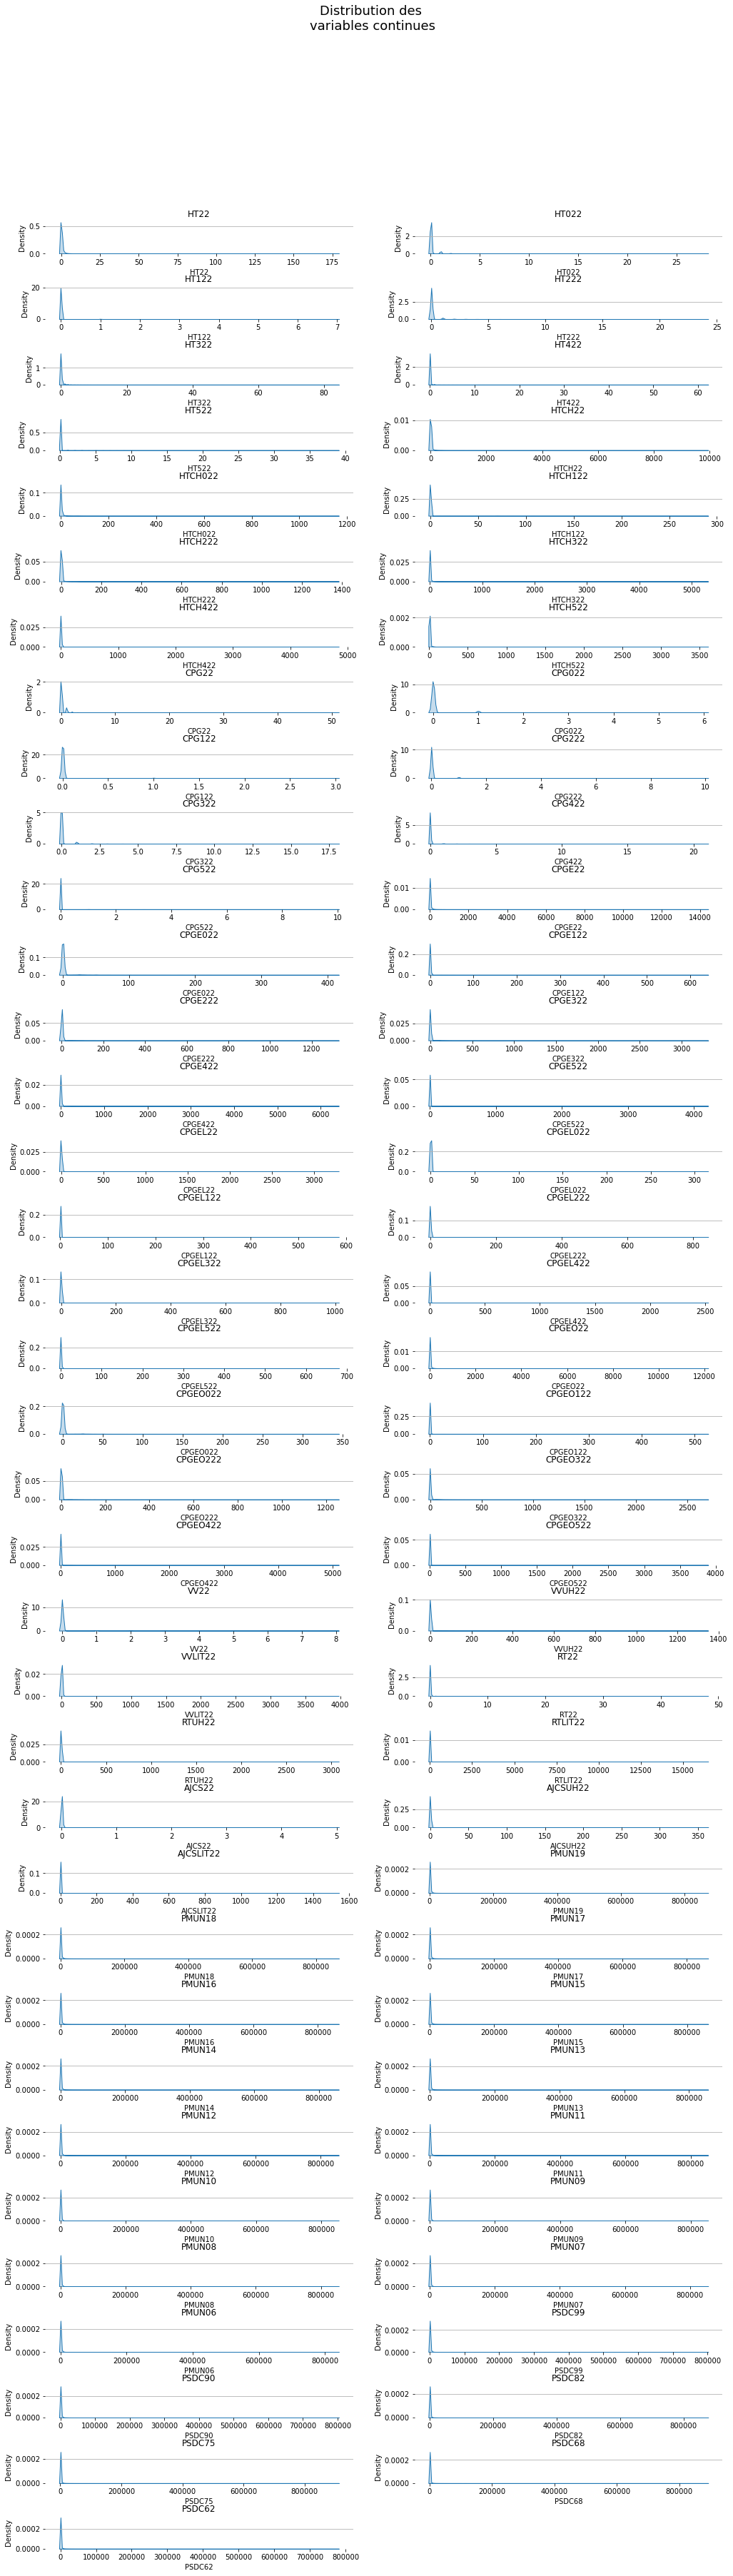

In [13]:
ncols = 2
nrows = len(col_numericals_int) // ncols + (len(col_numericals_int) % ncols > 0)
 
plt.figure(figsize=(17, 60))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals_int):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(ax=ax, data=table[variable], legend=None, shade=True)
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

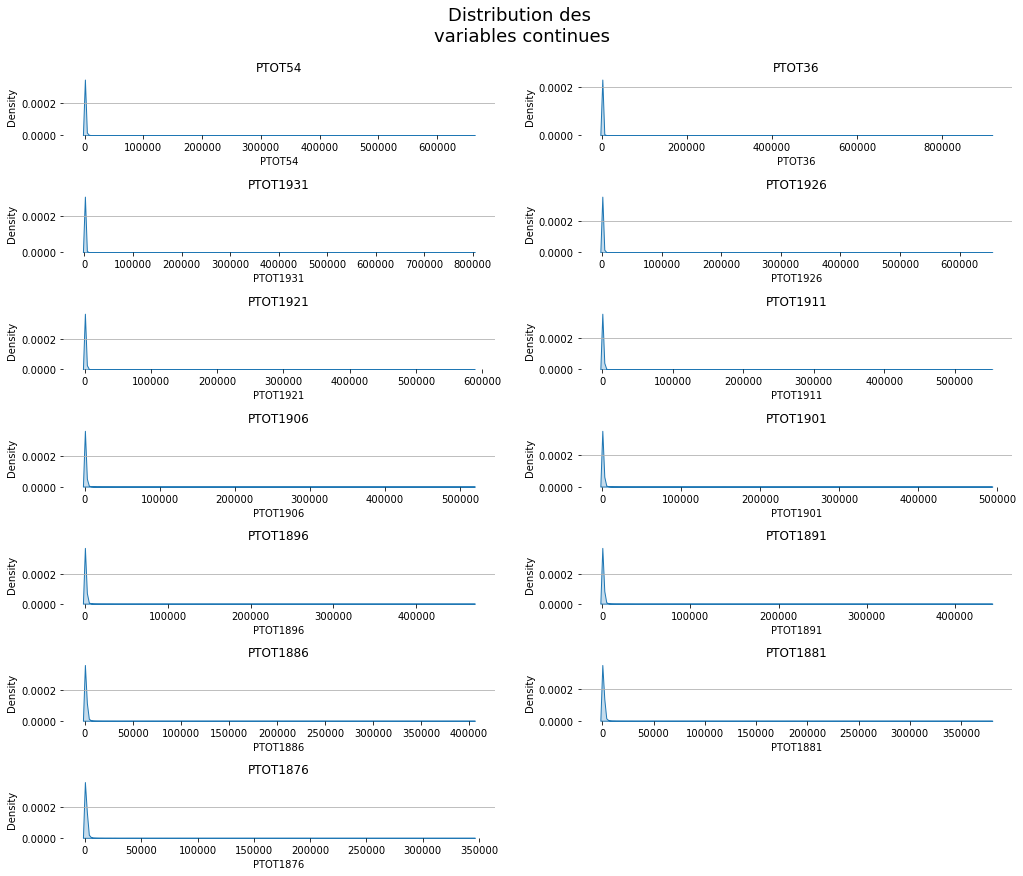

In [14]:
ncols = 2
nrows = len(col_numericals_float) // ncols + (len(col_numericals_float) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals_float):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(ax=ax, data=table[variable], legend=None, shade=True)
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

Nous voyons que nos données n'ont pas une distribution normale. Cela peut s'expliquer par plusieurs raisons :
* Nous avons bien entendu des communes qui sont plus peuplées que d'autres.
* La différence entre les communes peut se justifier par le changement de méthodes de dénombrement des années au cours du temps.

In [15]:
table_ = table[table['DEP']=='01']
table__= table[table['DEP']=='75']
print("\nLa population de 2019 pour les deux départements sont :")
print("    - Pour le département '75', la commune la moins peuplée a ", table__['PMUN19'].min(), "habitants tandis que la plus peuplée a ",
     table__['PMUN19'].max(), "habitants.")
print("    - Pour le département '01', la commune la moins peuplée a ", table_['PMUN19'].min(), "habitants tandis que la plus peuplée a ",
     table_['PMUN19'].max(), "habitants.")


La population de 2019 pour les deux départements sont :
    - Pour le département '75', la commune la moins peuplée a  15917 habitants tandis que la plus peuplée a  230981 habitants.
    - Pour le département '01', la commune la moins peuplée a  27 habitants tandis que la plus peuplée a  41111 habitants.


In [16]:
print("\n-----------------------------------------Statistiques des variables qualitatives ---------------------------------\n")


-----------------------------------------Statistiques des variables qualitatives ---------------------------------



In [17]:
def valeurs_uniques(df, liste_de_variables):
    for col in liste_de_variables:
        print("\n----- Statistiques de la variable ", col, " ---------")
        print(col, df[col].describe())

In [18]:
valeurs_uniques(table, col_categoricals)


----- Statistiques de la variable  CODGEO  ---------
CODGEO count     34957
unique    34957
top       01001
freq          1
Name: CODGEO, dtype: object

----- Statistiques de la variable  REG  ---------
REG count     34957
unique       17
top          44
freq       5121
Name: REG, dtype: object

----- Statistiques de la variable  DEP  ---------
DEP count     34957
unique      100
top          62
freq        890
Name: DEP, dtype: object

----- Statistiques de la variable  LIBGEO  ---------
LIBGEO count              34957
unique             32700
top       Sainte-Colombe
freq                  12
Name: LIBGEO, dtype: object


# Analyse des valeurs manquantes et des outliers

## Valeurs manquantes

In [19]:
def display_missing_values(df):
    count_missing_val = {}
    for c in df.columns:
        nb_miss = ((df[c].isna()) | (df[c].astype(str).str.strip()==""))*1
        nb_miss = nb_miss.sum()
        count_missing_val.update({c:[nb_miss,nb_miss/df.shape[0]]})
    
    res = pd.DataFrame(count_missing_val).T
    res = res.reset_index()
    res.columns = ['variable','nb_missing','pct_missing']
    
    display(res.sort_values('nb_missing',ascending=False))

In [20]:
display_missing_values(table)

,variable,nb_missing,pct_missing
87,PTOT1876,472.0,0.013502
82,PTOT1901,472.0,0.013502
77,PTOT1931,472.0,0.013502
79,PTOT1921,472.0,0.013502
80,PTOT1911,472.0,0.013502
...,...,...,...
27,CPGE422,0.0,0.000000
26,CPGE322,0.0,0.000000
25,CPGE222,0.0,0.000000
24,CPGE122,0.0,0.000000


Les variables affectées sont les variables de la population quand celle-ci était calculée `sans doubles comptes`. Nous visualisons les valeurs manquantes en lignes pour savoir si les valeurs manquantes des variables sont liées entre elles.

<AxesSubplot:>

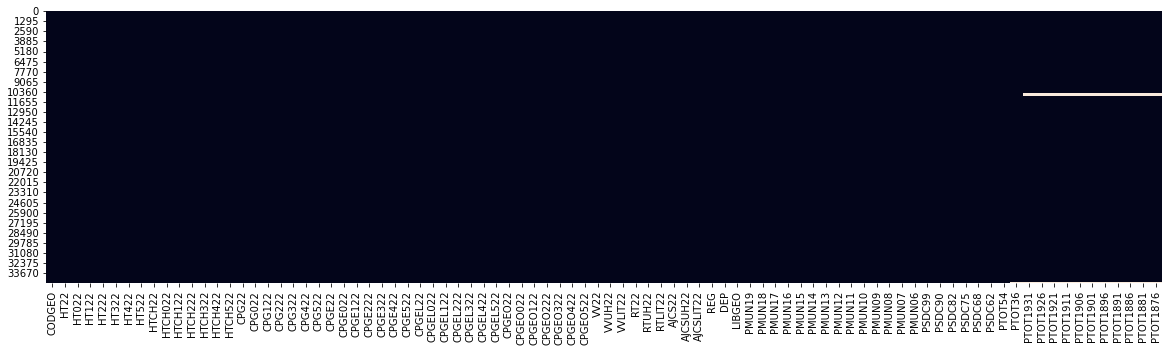

In [21]:
# Visualisation des valeurs manquantes en lignes
plt.figure(figsize=(20,5))
sns.heatmap(table.isna(), cbar=False)

D'après le graphique obtenu ci-dessus les valeurs manquantes sont liées entre elles car elles apparaissent quasiment sur une plage d'observations donnée. Nous allons plus loin pour savoir les communes concernées.

In [22]:
# Récupérer les observations qui ont des valeurs manquantes
table_na=table[table.isnull().any(axis=1)]
print(table_na.shape[0])
table_na['REG'].value_counts()

472


94    360
2      34
1      32
4      24
3      22
Name: REG, dtype: int64

In [23]:

table['REG'].value_counts()

44    5121
76    4454
75    4309
84    4029
32    3788
27    3700
28    2652
24    1757
11    1287
52    1235
53    1207
93     946
94     360
2       34
1       32
4       24
3       22
Name: REG, dtype: int64

Les valeurs manquantes concernent uniquement les régions '94', '1', '2', '3' et '4'. Nous regardons la base de données initiale pour savoir si ces données sont manquantes uniquements pour quelques communes des départements ou pour toute la région. Les résultats obtenus ci-dessous nous montrent que les valeurs manquantes concernent l'ensemble des communes des régions citées ci-dessus. 

Il serait justicieux donc de faire une imputation en tenant compte de la médiane de la population dans chaque région plutôt qu'une imputation en considérant l'ensemble des régions pour une année donnée. 

Cependant, comme le taux de valeurs manquantes est très faible, imputer en considérant la médiane en colonne n'aura pas un grand impact sur notre jeu de données.

**Remplacer les valeurs manquantes**

In [24]:
#Récupéper les index des lignes
table = table.fillna(table.median())

In [25]:
# Vérification
NAN = (table[table.columns[table.isna().sum()>0]].isna().sum()).sort_values(ascending=False)
NAN

Series([], dtype: float64)

## Gestion des outliers

Pour une meilleure analyse par la suite, il est important de visualiser les outliers et les valeurs abberrantes de notre jeu de données. Rappelons qu'une valeur est considée comme outlier si elle est supérieure à 1,5 fois l'intervalle interquartile et inférieure à 3 fois l'intervalle interquartile.

<img src="data/Outlier.png"></span>

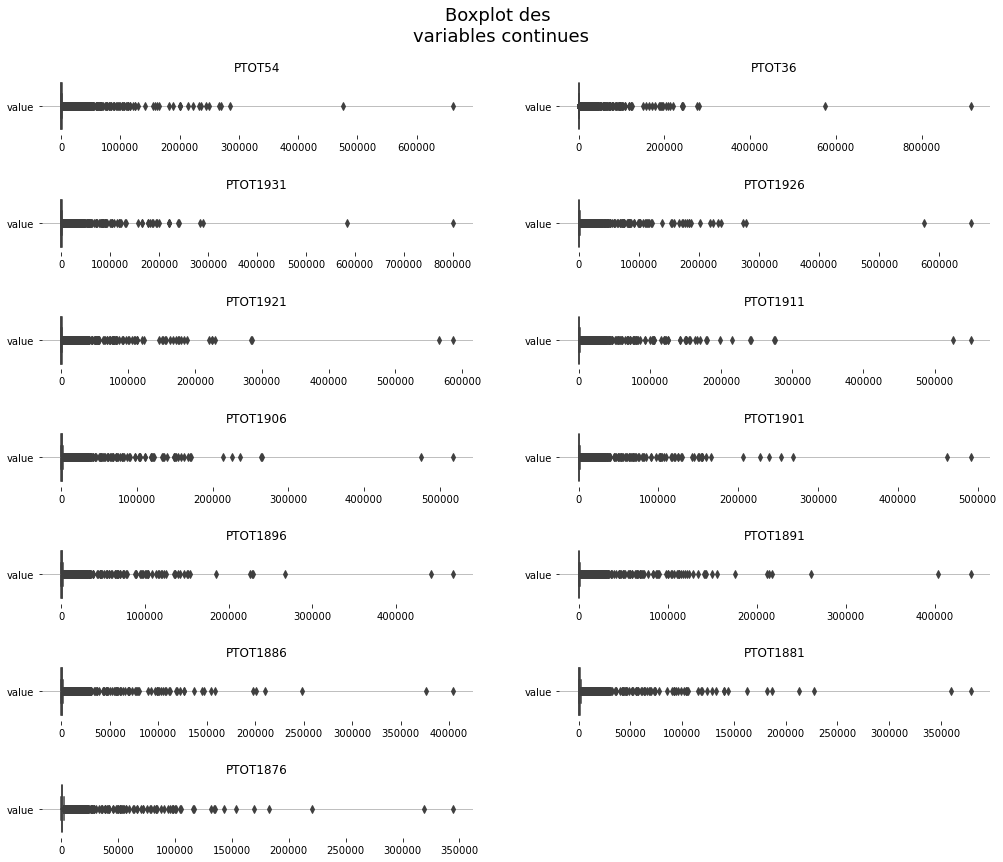

In [26]:
# On affiche les boxplots
temp=pd.melt(table[col_numericals_float].reset_index(), id_vars='index', value_vars=col_numericals_float).iloc[:,-2:]
 
ncols = 2
nrows = len(col_numericals_float) // ncols + (len(col_numericals_float) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals_float):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], orient='h')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

In [27]:
def is_outlier(df,column):
    
    # 1er Quartile 
    Q1 = df[df[column].notna()][column].quantile(0.25)
    
    # 3ème Quartile 
    Q3 = df[df[column].notna()][column].quantile(0.75)
    
    # Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    
    # limites, basse & haute
    limite_inf = Q1-1.5*IQR
    limte_sup = Q3+1.5*IQR
    
    # Remplace les données inférieur et supérieur à la limite par 1 et les autres par 0
    series = (~(df[column].between(limite_inf,limte_sup)))*1
    
    return series

In [28]:
outlier_table=table.copy()
for target_col in tqdm(col_numericals_float):
    outlier_table[target_col+'_is_outlier'] = is_outlier(outlier_table,target_col)

  0%|          | 0/13 [00:00<?, ?it/s]

In [29]:
outliers_count = {}
for target_col in tqdm(col_numericals_float):
    outliers_count.update({target_col:[outlier_table[target_col+'_is_outlier'].sum()]})

df_res = pd.DataFrame(outliers_count).T
df_res = df_res.reset_index()
df_res.columns = ['variable','nb_outlier']
df_res['pct_outlier'] = df_res["nb_outlier"]/outlier_table.shape[0]
df_res.sort_values('nb_outlier',ascending=False)

  0%|          | 0/13 [00:00<?, ?it/s]

,variable,nb_outlier,pct_outlier
0,PTOT54,3732,0.106760
2,PTOT1931,3496,0.100009
1,PTOT36,3491,0.099866
3,PTOT1926,3432,0.098178
4,PTOT1921,3322,0.095031
5,PTOT1911,3266,0.093429
6,PTOT1906,3170,0.090683
7,PTOT1901,3139,0.089796
8,PTOT1896,3059,0.087508
9,PTOT1891,2949,0.084361


Comme nous l'avons énoncé plus haut, nous ne pouvons pas supprimer les observations car nous ne pouvons pas les considérer comme des outliers. Sinon cela reviendra à supprimer une part non négligeable de notre jeu de données. Cependant, il faut les traiter pour éviter de donner un poids beaucoup trop important à ces observations. Pour cela nous avons pensé à agréger nos observations c'est-à-dire les regrouper par département pour travailler avec une maille moins fine.

Mais avant, pour une meilleure visibilité et une meilleure lecture de notre jeu de donnée nous rajoutons à nos données le lidéllé des département qui se trouve dans la base de données consommation. 


In [30]:
# Récupérer que les colonnes qui nous intéressent 
dep_label = consommation[['code_departement', 'libelle_departement']]

# Renommer la variable Code_departement
dep_label.rename(columns={'code_departement': 'DEP'}, inplace=True)

# Garder que les départements présents dans notre table
liste_DEP = table['DEP'].unique()
print(len(liste_DEP))

# Filtrer la table consommation en fonction des départements à garder
dep_label = dep_label[dep_label['DEP'].isin(liste_DEP)]

# Supprimer les doublons
dep_label.drop_duplicates(subset ="DEP", keep = 'first', inplace=True)
dep_label['DEP'].nunique()

100


100

In [31]:
table=pd.merge(table, dep_label, on='DEP')

**Regroupement**

In [32]:
table2 = table.groupby('libelle_departement').sum()

**Analyse des corrélations**

Notre jeu de données contient un très grand nombre de variables.

<AxesSubplot:>

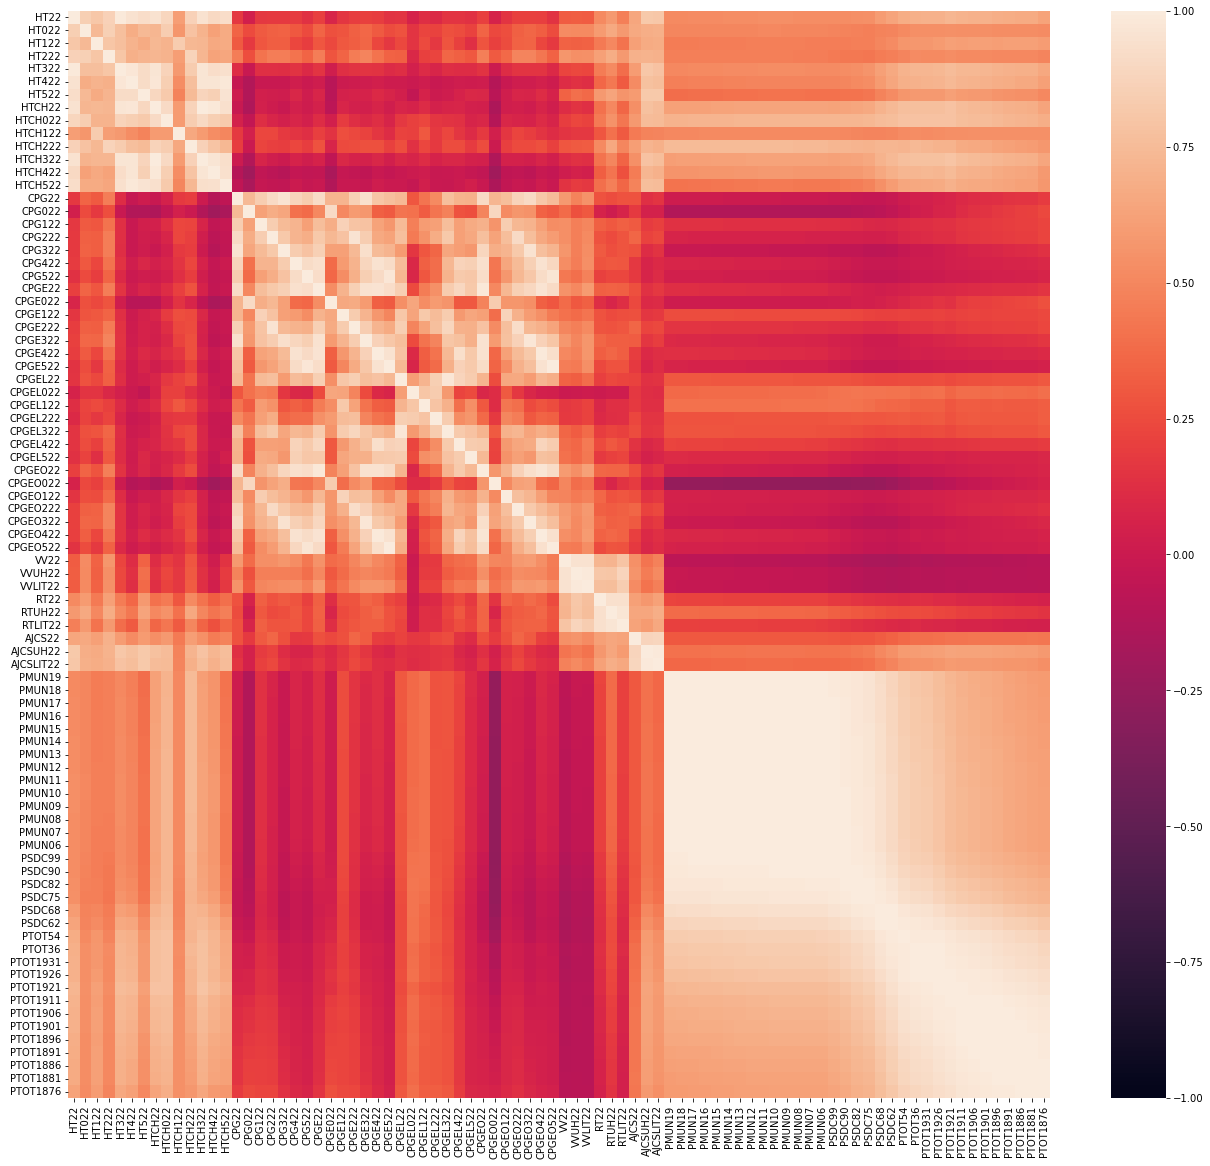

In [33]:
plt.figure(figsize = (22, 20))
sns.heatmap(table2.corr(), vmin=-1,vmax=1)

Nous avons de très fortes concentration de variables corrélées. Ce qui nous parait tout à fait normal. En effet, la population d'une région pour une année est liée à population de l'année précédente. Aussi, le nombre d'habitats ou de logements pour une ville est également liée à sa capacité d'acceuil sur l'année précédente. On s'attendait évidemment à ne pas constater de rupture énorme entre ces variables.

**Exportation de la base de données**

Maintenant, nous pouvons exporter notre base de données afin de l'utliser dans la suite de notre projet.

In [35]:
table2.to_csv('data/données.csv')